In [1]:
import structuralanalysistoolbox as stbox

### Create Model Object

In [2]:
model = stbox.Model(name="my-model")

### Import Mesh

In [3]:
model.import_mesh(r'C:\Users\yigit\StructuralAnalysisToolbox\examples\rod.cdb')
model.plot_mesh()

Widget(value='<iframe src="http://localhost:50407/index.html?ui=P_0x1e1cd005e80_0&reconnect=auto" class="pyvis…

### Select and Assign Material

In [4]:
stbox.matlib.list_materials()

My Steel
My Steel-2
My Steel-3
My Steel-4



In [5]:
steel = model.add_material(mat="My Steel")
model.assign_material("MESH", steel)

### Create a MPC Rigid

In [6]:
model.add_MPC_Rigid(dependent="NS_LOAD_DEPEN", independent="NS_LOAD")

### Show Model Info

In [7]:
model.info()

 ├── Element Types
 │   ├── SOLID185
 │   └── MPC184
 ├── Materials
 │   └── My Steel
 ├── Sets
 │   ├── Node Sets
 │   │   ├── NS_FIX
 │   │   ├── NS_LOAD
 │   │   └── NS_LOAD_DEPEN
 │   └── Element Sets
 │       └── MESH
 ├── Surfaces
 ├── Sections
 ├── Constraints
 │   ├── Linear Couplings
 │   ├── Constraint Equations
 │   ├── MPC
 │   │   └── MPC-1
 │   └── Joints
 ├── Contacts
 └── Load Steps
     ├── Parameters
     ├── Boundary Conditions
     ├── Loads
     ├── Outputs
     └── Restart


### Create Load Steps

In [8]:
load_step_1 = model.add_load_step()
load_step_1.force("NS_LOAD", "X", 3000)
load_step_1.dof("NS_FIX", "ALL", 0)

load_step_1.output("NODAL DOF", "ALL")
load_step_1.output("REACTION LOADS", "ALL")
load_step_1.output("NODAL-AVG PLASTIC STRAINS", "ALL")
load_step_1.output("NODAL-AVG STRESSES", "ALL")
load_step_1.output("EL-NODAL LOAD", "ALL")

In [9]:
# dof and output definitions inherited from the load step 1
load_step_2 = model.add_load_step()
load_step_2.force("NS_LOAD", "X", -2000, operation="ADD")

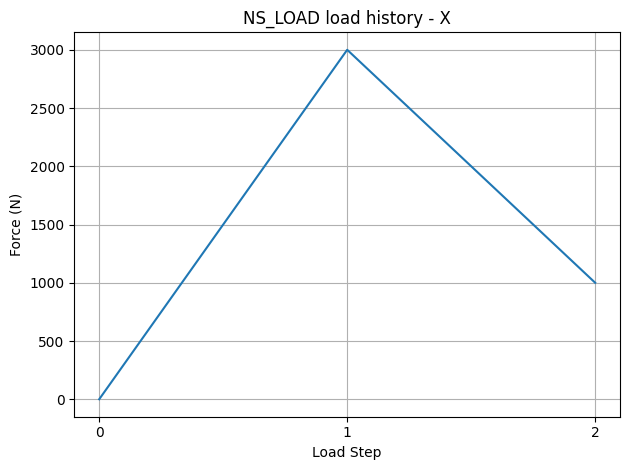

In [10]:
model.plot_load_history(nodes="NS_LOAD", load_type="Force", direction="X")

In [11]:
model.solve()

MapdlExitedError: Error:
MAPDL server connection terminated unexpectedly while running:
  SOLVE,
called by:
  _send_command

Suggestions:
  MAPDL *might* have died because it executed a not-allowed command or ran out of memory.
  Check the MAPDL command output for more details.
  Open an issue on GitHub if you need assistance: https://github.com/ansys/pymapdl/issues
MAPDL instance:
  c:\Users\yigit\StructuralAnalysisToolbox\examples\06_Solution\my-model_1766323004.299354
  127.0.0.1:50052
Error:
  failed to connect to all addresses; last error: UNAVAILABLE: ipv4:127.0.0.1:50052: ConnectEx: Connection refused (Unable to retrieve error string -- 10061)
Full error:
<_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "failed to connect to all addresses; last error: UNAVAILABLE: ipv4:127.0.0.1:50052: ConnectEx: Connection refused (Unable to retrieve error string -- 10061)"
	debug_error_string = "UNKNOWN:Error received from peer  {grpc_message:"failed to connect to all addresses; last error: UNAVAILABLE: ipv4:127.0.0.1:50052: ConnectEx: Connection refused (Unable to retrieve error string -- 10061)", grpc_status:14, created_time:"2025-12-21T13:24:36.1607238+00:00"}"
>